In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds
plt.rc(group = 'figure', figsize = (4, 4))

In [2]:
os.getcwd()

'C:\\Users\\fins\\Documents\\project\\code'

In [ ]:
os.chdir('../../data')

In [4]:
sorted(os.listdir())

['APT_Data_Prep.csv',
 'APT_Detail_Seoul_2024.csv',
 'APT_Detail_Seoul_2024.xlsx',
 'APT_Price.csv',
 'APT_Price.pkl',
 'APT_Price.xlsx',
 'APT_Price_Seoul_Merged_2020~2024.csv',
 'APT_Price_Seoul_Merged_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2020.csv',
 'APT_Price_Seoul_Split_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2021.csv',
 'APT_Price_Seoul_Split_2022.csv',
 'APT_Price_Seoul_Split_2023.csv',
 'APT_Price_Seoul_Split_2024.csv',
 'Cereal.pkl',
 'Diabetes.pkl',
 'Marine_Product.csv',
 'Marine_Product.pkl',
 'Marine_Product.xlsx',
 'NA_Sample.xlsx',
 'Pivot_Table_Marine.xlsx',
 'Pivot_table_APT.xlsx',
 'Used_Cars.csv',
 'Used_Cars.pkl',
 'Used_Cars.xlsx',
 'Used_Cars_Prep.pkl',
 'WhiteWine.pkl',
 'dtc_full.png',
 'dtr_full.png',
 'test.png']

In [5]:
objs = pd.read_pickle('WhiteWine.pkl')

In [6]:
globals().update(objs)

In [8]:
from xgboost import XGBClassifier

In [9]:
model = XGBClassifier(n_estimators = 1000, early_stopping_rounds = 50)

In [11]:
model.fit(X = X_tr, y = y_tr, eval_set = [(X_vl, y_vl)], verbose = False)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",50
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [12]:
model.score(X = X_tr, y = y_tr)

0.9787047841306884

In [13]:
model.score(X = X_vl, y = y_vl)

0.8625850340136054

In [14]:
pd.Series(data = model.feature_importances_, 
          index = model.feature_names_in_) \
  .sort_values(ascending = False)

alcohol                0.286542
volatile acidity       0.109119
residual sugar         0.083838
citric acid            0.082822
pH                     0.076925
sulphates              0.075249
fixed acidity          0.074383
free sulfur dioxide    0.074229
chlorides              0.074204
density                0.062689
dtype: float32

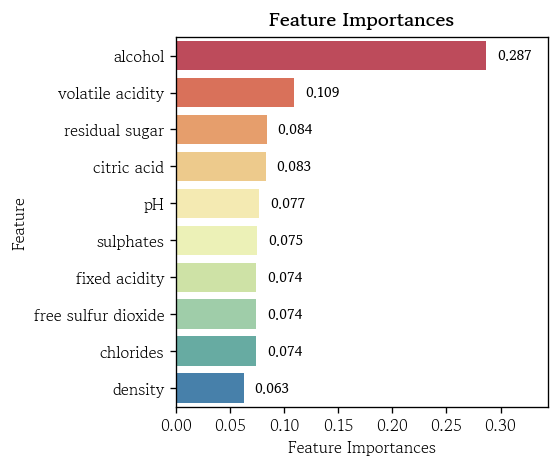

In [15]:
hds.plot.feature_importance(model)

In [16]:
model.get_booster().num_boosted_rounds()

99

In [17]:
model.best_iteration

48

In [18]:
model.best_score

0.33578932822908064

In [19]:
y_pred = model.predict(X = X_vl)

In [20]:
hds.stat.clfmetrics(y_true = y_vl, y_pred = y_pred)

In [21]:
y_prob = model.predict_proba(X = X_vl)

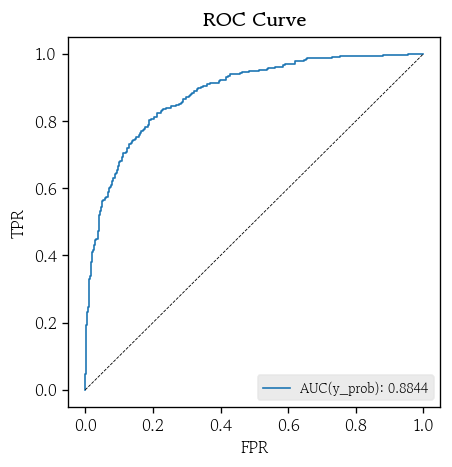

In [22]:
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob)

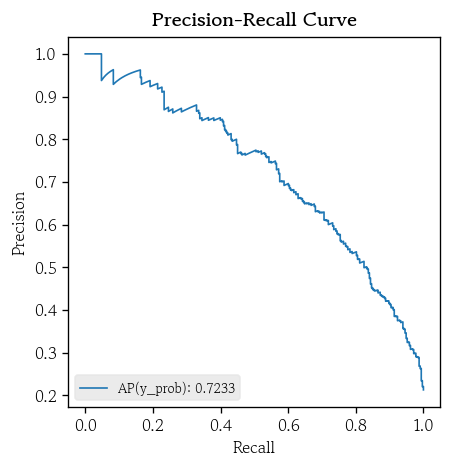

In [23]:
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob)

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE(k_neighbors = 5, random_state = 0)

In [26]:
X_bal, y_bal = smote.fit_resample(X = X_tr, y = y_tr)

In [27]:
model_bal = XGBClassifier(n_estimators = 1000, early_stopping_rounds = 50)

In [28]:
model_bal.fit(X = X_bal, y = y_bal, eval_set = [(X_vl, y_vl)], verbose = False)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",50
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [29]:
model_bal.score(X = X_bal, y = y_bal)

0.9919806042521447

In [30]:
model_bal.score(X = X_vl, y = y_vl)

0.8482993197278912

In [31]:
model_bal.get_booster().num_boosted_rounds()

116

In [32]:
model_bal.best_iteration

65

In [33]:
y_pred_bal = model_bal.predict(X = X_vl)

In [35]:
hds.stat.clfmetrics(y_true = y_vl, y_pred = y_pred_bal)

In [36]:
y_prob_bal = model_bal.predict_proba(X = X_vl)

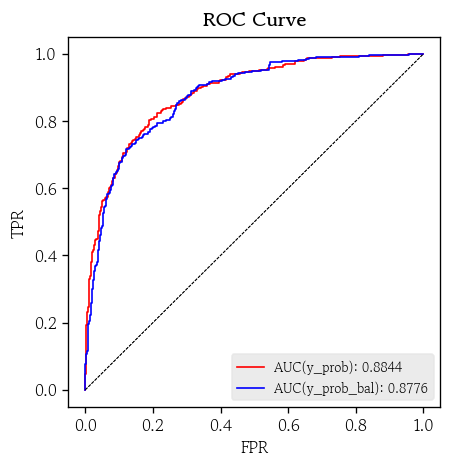

In [37]:
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob, color = 'red')
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob_bal, color = 'blue')

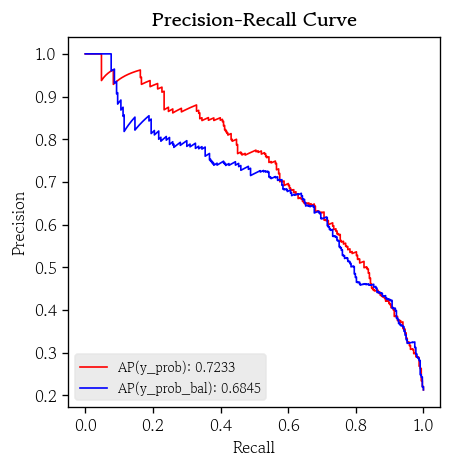

In [38]:
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob, color = 'red')
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob_bal, color = 'blue')

In [43]:
y_vl.value_counts()

grade
0    1157
1     313
Name: count, dtype: int64

In [44]:
ratio = 1157 / 313

In [45]:
model_wgt = XGBClassifier(n_estimators = 1000, 
                          early_stopping_rounds = 50, 
                          scale_pos_weight = ratio)

In [46]:
model_wgt.fit(X = X_tr, y = y_tr, eval_set = [(X_vl, y_vl)], verbose = False)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",50
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [47]:
model_wgt.score(X = X_tr, y = y_tr)

0.9787047841306884

In [48]:
model_wgt.score(X = X_vl, y = y_vl)

0.8394557823129252

In [49]:
y_pred_wgt = model_wgt.predict(X = X_vl)

In [51]:
hds.stat.clfmetrics(y_true = y_vl, y_pred = y_pred_wgt)

In [53]:
y_prob_wgt = model_wgt.predict_proba(X = X_vl)

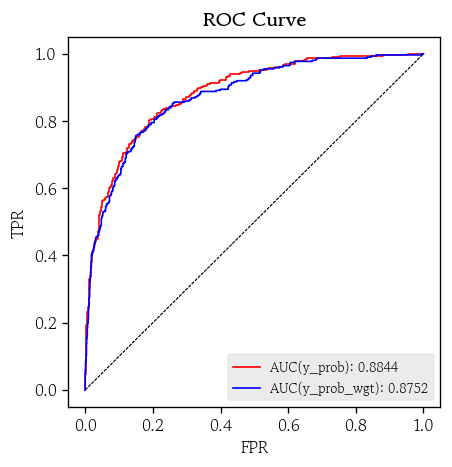

In [54]:
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob, color = 'red')
hds.plot.roc_curve(y_true = y_vl, y_prob = y_prob_wgt, color = 'blue')

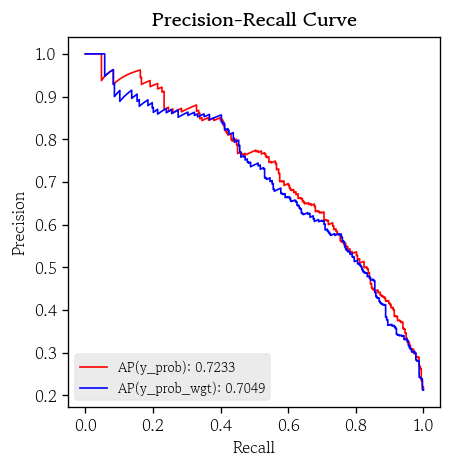

In [55]:
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob, color = 'red')
hds.plot.pr_curve(y_true = y_vl, y_prob = y_prob_wgt, color = 'blue')

In [56]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_true = y_vl, y_score = y_prob[:, 1])

0.8843516751762435

In [59]:
roc_auc_score(y_true = y_vl, y_score = y_prob_wgt[:, 1])

0.8752157308893499